In [ ]:
!git clone https://github.com/Imomazin/privacy-federated-deep-learning.git
%cd privacy-federated-deep-learning

Cloning into 'privacy-federated-deep-learning'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 41 (delta 9), reused 19 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (41/41), 21.99 KiB | 4.40 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/privacy-federated-deep-learning


In [ ]:
!pip install torch torchvision numpy pandas matplotlib pyyaml

In [ ]:
!python experiments/exp1_fedavg_cifar10.py

Loading config from: /content/privacy-federated-deep-learning/experiments/configs/exp1_fedavg_cifar10.yaml
Experiment 1: FedAvg Baseline on CIFAR-10
Device: cpu
Seed: 42
Clients: 50, Per round: 10
Non-IID alpha: 0.5
Rounds: 100, Local epochs: 1
Batch size: 64, LR: 0.01

Loading CIFAR-10 dataset...
100% 170M/170M [00:03<00:00, 47.1MB/s]
Train samples: 50000, Test samples: 10000

Creating Dirichlet partition (alpha=0.5)...

Data Partition Statistics
Total samples: 50000
Number of clients: 50
Number of classes: 10

Samples per client:
  Min: 87
  Max: 2578
  Mean: 1000.0
  Std: 446.0

Class distribution (showing first 5 clients):
  Client 0: [np.int64(7), np.int64(71), np.int64(100), np.int64(18), np.int64(228), np.int64(47), np.int64(258), np.int64(76), np.int64(23), np.int64(10)]
  Client 1: [np.int64(53), np.int64(38), np.int64(14), np.int64(8), np.int64(143), np.int64(25), np.int64(42), np.int64(3), np.int64(6), np.int64(8)]
  Client 2: [np.int64(8), np.int64(60), np.int64(228), np.in

In [ ]:
!ls -lh results/exp1_fedavg_cifar10/

total 92K
-rw-r--r-- 1 root root 4.6K Jan 11 12:18 metrics.csv
-rw-r--r-- 1 root root  81K Jan 11 12:18 training_curves.png


In [ ]:
!git config --global user.name "Imo Enang"
!git config --global user.email "imomazin.ae@gmail.com"

In [ ]:
!git add results/exp1_fedavg_cifar10/
!git commit -m "Add Experiment 1 FedAvg CIFAR-10 baseline results"
!git push

[main 6b81a2d] Add Experiment 1 FedAvg CIFAR-10 baseline results
 2 files changed, 101 insertions(+)
 create mode 100644 results/exp1_fedavg_cifar10/metrics.csv
 create mode 100644 results/exp1_fedavg_cifar10/training_curves.png
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
from google.colab import files
files.download("results/exp1_fedavg_cifar10/metrics.csv")
files.download("results/exp1_fedavg_cifar10/training_curves.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cp experiments/exp1_fedavg_cifar10.py experiments/exp2_dp_fedavg_cifar10.py

In [ ]:
ls experiments/

configs/  exp1_fedavg_cifar10.py  exp2_dp_fedavg_cifar10.py


In [ ]:
!sed -n '1,200p' experiments/exp2_dp_fedavg_cifar10.py

#!/usr/bin/env python3
"""
Experiment 1: FedAvg Baseline on CIFAR-10 with Non-IID Data

This script runs the FedAvg algorithm on CIFAR-10 with Dirichlet-based
non-IID data partitioning. It serves as a baseline for privacy and
attack experiments.

Usage:
    python experiments/exp1_fedavg_cifar10.py
    python experiments/exp1_fedavg_cifar10.py --config experiments/configs/exp1_fedavg_cifar10.yaml

Outputs:
    - results/exp1_fedavg_cifar10/metrics.csv
    - results/exp1_fedavg_cifar10/training_curves.png
"""

import argparse
import os
import sys
import random
from pathlib import Path

import numpy as np
import pandas as pd
import torch
import yaml
import matplotlib
matplotlib.use('Agg')  # Non-interactive backend for saving plots
import matplotlib.pyplot as plt

# Add project root to path
PROJECT_ROOT = Path(__file__).parent.parent
sys.path.insert(0, str(PROJECT_ROOT))

from src.models.cnn import CIFAR10CNN
from src.data.cifar10 import (
    load_cifar10,
    dirichlet_partition,
    g

In [ ]:
!ls experiments/configs/

exp1_fedavg_cifar10.yaml


In [ ]:
!cp experiments/configs/exp1_fedavg_cifar10.yaml experiments/configs/exp2_dp_fedavg_cifar10.yaml

In [ ]:
!sed -n '1,200p' experiments/configs/exp2_dp_fedavg_cifar10.yaml

# Experiment 1: FedAvg Baseline on CIFAR-10 with Non-IID Data
# This configuration defines all hyperparameters for the baseline experiment

experiment:
  name: "exp1_fedavg_cifar10"
  description: "FedAvg baseline on CIFAR-10 under non-IID Dirichlet partition"
  seed: 42

# Dataset configuration
data:
  dataset: "cifar10"
  data_dir: "./data/cifar10"
  num_classes: 10

# Non-IID partitioning
partition:
  num_clients: 50
  alpha: 0.5  # Dirichlet concentration parameter (lower = more non-IID)
  min_samples_per_client: 10

# Federated learning configuration
federated:
  algorithm: "fedavg"
  num_rounds: 100
  clients_per_round: 10  # 20% of 50 clients
  local_epochs: 1

# Training configuration
training:
  batch_size: 64
  optimizer: "sgd"
  lr: 0.01
  momentum: 0.9
  weight_decay: 0.0005  # 5e-4
  loss: "cross_entropy"

# Model configuration
model:
  architecture: "cifar10_cnn"
  num_classes: 10

# Evaluation configuration
evaluation:
  eval_every: 1  # Evaluate every round
  test_batch

In [ ]:
%%bash
mkdir -p experiments/configs
cat > experiments/configs/exp2_dp_fedavg_cifar10.yaml << 'EOF'
experiment:
  name: "exp2_dp_fedavg_cifar10"
  description: "DP-FedAvg on CIFAR-10 under non-IID Dirichlet partition"
  seed: 42

data:
  dataset: "cifar10"
  data_dir: "./data/cifar10"
  num_classes: 10

partition:
  num_clients: 50
  alpha: 0.5
  min_samples_per_client: 10

federated:
  algorithm: "fedavg"
  num_rounds: 100
  clients_per_round: 10
  local_epochs: 1

training:
  batch_size: 64
  optimizer: "sgd"
  lr: 0.01
  momentum: 0.9
  weight_decay: 0.0005
  loss: "cross_entropy"

dp:
  enabled: true
  noise_multiplier: 1.0
  max_grad_norm: 1.0
  delta: 1e-5

model:
  architecture: "cifar10_cnn"
  num_classes: 10

evaluation:
  eval_every: 1
  test_batch_size: 128

output:
  results_dir: "./results/exp2_dp_fedavg_cifar10"
  save_metrics: true
  save_plots: true
  metrics_file: "metrics.csv"
  plot_file: "training_curves.png"
EOF

In [ ]:
ls experiments/configs

 exp1_fedavg_cifar10.yaml   exp2_dp_fedavg_cifar10.yaml  'Untitled Folder'/


In [ ]:
!ls results/exp2_dp_fedavg_cifar10/

ls: cannot access 'results/exp2_dp_fedavg_cifar10/': No such file or directory


In [ ]:
!ls /content

sample_data


In [ ]:
%cd /content
!git clone https://github.com/Imomazin/privacy-federated-deep-learning.git

/content
Cloning into 'privacy-federated-deep-learning'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 51 (delta 11), reused 19 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 100.78 KiB | 5.93 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
%cd /content
!git clone https://github.com/Imomazin/privacy-federated-deep-learning.git

/content
fatal: destination path 'privacy-federated-deep-learning' already exists and is not an empty directory.


In [ ]:
%cd /content/privacy-federated-deep-learning
!ls

/content/privacy-federated-deep-learning
attacks  data  experiments  README.md  results	src


In [ ]:
!ls experiments
!ls experiments/configs

configs  exp1_fedavg_cifar10.py
exp1_fedavg_cifar10.yaml


In [ ]:
!python experiments/exp2_dp_fedavg_cifar10.py --config experiments/configs/exp2_dp_fedavg_cifar10.yaml

python3: can't open file '/content/privacy-federated-deep-learning/experiments/exp2_dp_fedavg_cifar10.py': [Errno 2] No such file or directory


In [ ]:
!cp experiments/exp1_fedavg_cifar10.py experiments/exp2_dp_fedavg_cifar10.py


In [ ]:
!ls experiments

configs  exp1_fedavg_cifar10.py  exp2_dp_fedavg_cifar10.py


In [ ]:
!python experiments/exp2_dp_fedavg_cifar10.py --config experiments/configs/exp2_dp_fedavg_cifar10.yaml

Loading config from: /content/privacy-federated-deep-learning/experiments/configs/exp1_fedavg_cifar10.yaml
Experiment 1: FedAvg Baseline on CIFAR-10
Device: cpu
Seed: 42
Clients: 50, Per round: 10
Non-IID alpha: 0.5
Rounds: 100, Local epochs: 1
Batch size: 64, LR: 0.01

Loading CIFAR-10 dataset...
100% 170M/170M [00:05<00:00, 29.1MB/s]
Train samples: 50000, Test samples: 10000

Creating Dirichlet partition (alpha=0.5)...

Data Partition Statistics
Total samples: 50000
Number of clients: 50
Number of classes: 10

Samples per client:
  Min: 87
  Max: 2578
  Mean: 1000.0
  Std: 446.0

Class distribution (showing first 5 clients):
  Client 0: [np.int64(7), np.int64(71), np.int64(100), np.int64(18), np.int64(228), np.int64(47), np.int64(258), np.int64(76), np.int64(23), np.int64(10)]
  Client 1: [np.int64(53), np.int64(38), np.int64(14), np.int64(8), np.int64(143), np.int64(25), np.int64(42), np.int64(3), np.int64(6), np.int64(8)]
  Client 2: [np.int64(8), np.int64(60), np.int64(228), np.in

In [ ]:
!ls results

exp1_fedavg_cifar10  exp1_fedavg_cifar10_metrics.csv  training_curves.png


In [ ]:
!ls results/exp1_fedavg_cifar10


metrics.csv  training_curves.png


(np.float64(-0.5), np.float64(1781.5), np.float64(729.5), np.float64(-0.5))

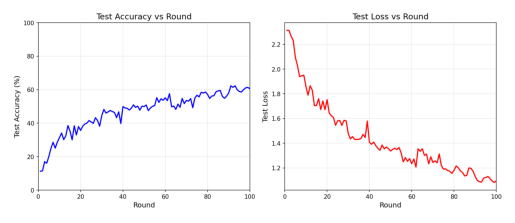

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("results/exp1_fedavg_cifar10/training_curves.png")
plt.imshow(img)
plt.axis("off")


In [ ]:
!cp results/exp1_fedavg_cifar10/* /content

cp: cannot stat 'results/exp1_fedavg_cifar10/*': No such file or directory


In [ ]:
!pwd


/content


In [ ]:
!ls /content

sample_data


In [ ]:
%cd /content
!git clone https://github.com/Imomazin/privacy-federated-deep-learning.git

/content
Cloning into 'privacy-federated-deep-learning'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 51 (delta 11), reused 19 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 100.78 KiB | 4.03 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
%cd /content/privacy-federated-deep-learning
!pwd

/content/privacy-federated-deep-learning
/content/privacy-federated-deep-learning


In [ ]:
pwd

'/content'

In [ ]:
%cd /content
!rm -rf privacy-federated-deep-learning
!git clone https://github.com/Imomazin/privacy-federated-deep-learning.git

/content
Cloning into 'privacy-federated-deep-learning'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 51 (delta 11), reused 19 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 100.78 KiB | 11.20 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
%cd /content/privacy-federated-deep-learning
!pwd
!ls

/content/privacy-federated-deep-learning
/content/privacy-federated-deep-learning
attacks  data  experiments  README.md  results	src


In [ ]:
%cd /content
!rm -rf privacy-federated-deep-learning
!git clone https://github.com/Imomazin/privacy-federated-deep-learning.git
%cd privacy-federated-deep-learning
!ls




/content
Cloning into 'privacy-federated-deep-learning'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 51 (delta 11), reused 19 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 100.78 KiB | 973.00 KiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/privacy-federated-deep-learning
attacks  data  experiments  README.md  results	src


In [ ]:
!pip install opacus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.4/254.4 kB 5.6 MB/s eta 0:00:00


In [ ]:
%%writefile experiments/exp2_dp_fedavg_cifar10.py
import os
import csv
import torch
import numpy as np
import matplotlib.pyplot as plt

from src.models.cnn import CNN
from src.data.cifar10 import load_cifar10_non_iid
from src.federated.fedavg import FedAvgServer

from opacus import PrivacyEngine

# =====================
# CONFIG
# =====================
SEED = 42
NUM_CLIENTS = 50
CLIENTS_PER_ROUND = 10
ROUNDS = 100
LOCAL_EPOCHS = 1
BATCH_SIZE = 64
LR = 0.01
ALPHA = 0.5

NOISE_MULTIPLIER = 1.0
MAX_GRAD_NORM = 1.0

RESULTS_DIR = "results/exp2_dp_fedavg_cifar10"
os.makedirs(RESULTS_DIR, exist_ok=True)

torch.manual_seed(SEED)
np.random.seed(SEED)

device = "cuda" if torch.cuda.is_available() else "cpu"

# =====================
# DATA
# =====================
train_loaders, test_loader = load_cifar10_non_iid(
    num_clients=NUM_CLIENTS,
    alpha=ALPHA,
    batch_size=BATCH_SIZE
)

# =====================
# MODEL
# =====================
model = CNN().to(device)

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=LR,
    momentum=0.9
)

privacy_engine = PrivacyEngine()

model, optimizer, train_loaders = privacy_engine.make_private(
    module=model,
    optimizer=optimizer,
    data_loader=train_loaders,
    noise_multiplier=NOISE_MULTIPLIER,
    max_grad_norm=MAX_GRAD_NORM,
)

server = FedAvgServer(
    model=model,
    num_clients=NUM_CLIENTS,
    clients_per_round=CLIENTS_PER_ROUND,
    local_epochs=LOCAL_EPOCHS,
    device=device
)

metrics = []

# =====================
# TRAINING
# =====================
for rnd in range(1, ROUNDS + 1):
    train_loss = server.train_round(train_loaders)
    test_loss, test_acc = server.evaluate(test_loader)

    epsilon = privacy_engine.get_epsilon(delta=1e-5)

    print(
        f"Round {rnd}/{ROUNDS} | "
        f"Train Loss: {train_loss:.4f} | "
        f"Test Acc: {test_acc*100:.2f}% | "
        f"ε: {epsilon:.2f}"
    )

    metrics.append([rnd, test_loss, test_acc, epsilon])

# =====================
# SAVE RESULTS
# =====================
with open(f"{RESULTS_DIR}/metrics.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Round", "TestLoss", "TestAccuracy", "Epsilon"])
    writer.writerows(metrics)

rounds = [m[0] for m in metrics]
accs = [m[2] for m in metrics]
eps = [m[3] for m in metrics]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(rounds, accs)
plt.title("Test Accuracy")

plt.subplot(1,2,2)
plt.plot(rounds, eps)
plt.title("Privacy ε")

plt.savefig(f"{RESULTS_DIR}/training_curves.png")
plt.close()

print("DP Experiment complete.")

Writing experiments/exp2_dp_fedavg_cifar10.py


In [ ]:
!python experiments/exp2_dp_fedavg_cifar10.py

Traceback (most recent call last):
  File "/content/privacy-federated-deep-learning/experiments/exp2_dp_fedavg_cifar10.py", line 7, in <module>
    from src.models.cnn import CNN
ModuleNotFoundError: No module named 'src'


In [ ]:
!PYTHONPATH=. python experiments/exp2_dp_fedavg_cifar10.py

Traceback (most recent call last):
  File "/content/privacy-federated-deep-learning/experiments/exp2_dp_fedavg_cifar10.py", line 7, in <module>
    from src.models.cnn import CNN
ImportError: cannot import name 'CNN' from 'src.models.cnn' (/content/privacy-federated-deep-learning/src/models/cnn.py)


In [ ]:
!sed -n '1,200p' src/models/cnn.py

"""
Small CNN model for CIFAR-10 classification.
Architecture: 2 conv blocks + 2 FC layers
"""

import torch
import torch.nn as nn
import torch.nn.functional as F


class CIFAR10CNN(nn.Module):
    """
    A small CNN suitable for CIFAR-10 federated learning experiments.

    Architecture:
        - Conv block 1: Conv2d(3, 32) -> ReLU -> Conv2d(32, 64) -> ReLU -> MaxPool -> Dropout
        - Conv block 2: Conv2d(64, 128) -> ReLU -> MaxPool -> Dropout
        - FC layers: Linear(128*6*6, 256) -> ReLU -> Dropout -> Linear(256, 10)

    Input: (batch, 3, 32, 32) CIFAR-10 images
    Output: (batch, 10) class logits
    """

    def __init__(self, num_classes: int = 10):
        super().__init__()

        # Conv block 1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout2d(0.25)

        # Conv block 2
        self.conv3 = nn.Conv2d(64, 128

In [ ]:
cd /content/privacy-federated-deep-learning


/content/privacy-federated-deep-learning


In [ ]:
%%bash
cat > experiments/exp2_dp_fedavg_cifar10_colab.py << 'EOF'
import os
import csv
import math
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from opacus import PrivacyEngine
from collections import defaultdict
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================
SEED = 42
NUM_CLIENTS = 50
CLIENTS_PER_ROUND = 10
ROUNDS = 100
LOCAL_EPOCHS = 1
BATCH_SIZE = 64
LR = 0.01
ALPHA = 0.5
NOISE_MULTIPLIER = 1.0
MAX_GRAD_NORM = 1.0

RESULTS_DIR = "results/exp2_dp_fedavg_cifar10"
os.makedirs(RESULTS_DIR, exist_ok=True)

torch.manual_seed(SEED)
random.seed(SEED)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# =========================
# MODEL (INLINE)
# =========================
class CIFAR10CNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# =========================
# DATA
# =========================
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)

# Dirichlet split
targets = train_dataset.targets
class_indices = defaultdict(list)
for idx, label in enumerate(targets):
    class_indices[label].append(idx)

client_indices = [[] for _ in range(NUM_CLIENTS)]
for c in range(10):
    proportions = torch.distributions.Dirichlet(
        torch.full((NUM_CLIENTS,), ALPHA)
    ).sample()
    proportions = proportions / proportions.sum()
    splits = (proportions * len(class_indices[c])).long()
    splits[-1] += len(class_indices[c]) - splits.sum()

    start = 0
    for i, count in enumerate(splits):
        client_indices[i].extend(class_indices[c][start:start+count])
        start += count

# =========================
# EVAL
# =========================
def evaluate(model):
    model.eval()
    loader = DataLoader(test_dataset, batch_size=256)
    correct, total, loss_sum = 0, 0, 0.0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            out = model(x)
            loss = F.cross_entropy(out, y)
            loss_sum += loss.item() * y.size(0)
            preds = out.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
    return loss_sum / total, correct / total

# =========================
# FEDERATED TRAINING
# =========================
global_model = CIFAR10CNN().to(DEVICE)
metrics = []

for rnd in range(1, ROUNDS + 1):
    selected = random.sample(range(NUM_CLIENTS), CLIENTS_PER_ROUND)
    global_weights = {k: v.clone() for k, v in global_model.state_dict().items()}

    for cid in selected:
        local_model = CIFAR10CNN().to(DEVICE)
        local_model.load_state_dict(global_weights)

        optimizer = torch.optim.SGD(local


bash: line 127: warning: here-document at line 1 delimited by end-of-file (wanted `EOF')


In [2]:
!pip install -q opacus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.4/254.4 kB 5.6 MB/s eta 0:00:00


In [6]:
# =========================
# SETUP
# =========================
!pip install -q torch torchvision opacus matplotlib

import os, random, csv
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, Subset
from opacus import PrivacyEngine

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

NUM_CLIENTS = 10
CLIENTS_PER_ROUND = 5
ROUNDS = 10
LOCAL_EPOCHS = 1
BATCH_SIZE = 64
LR = 0.05

NOISE_MULTIPLIER = 1.2
MAX_GRAD_NORM = 1.0
DELTA = 1e-5

RESULTS_DIR = "results"
os.makedirs(RESULTS_DIR, exist_ok=True)

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)


In [9]:
# =========================
# MODEL
# =========================
class CIFAR10CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        return self.fc(x)


In [10]:
# =========================
# DATA
# =========================
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)

testloader = DataLoader(testset, batch_size=256, shuffle=False)

def non_iid_split(dataset, num_clients):
    labels = np.array(dataset.targets)
    idxs = np.arange(len(labels))
    idxs_labels = np.vstack((idxs, labels))
    idxs_labels = idxs_labels[:, idxs_labels[1].argsort()]
    shards = np.array_split(idxs_labels[0], num_clients)
    return [list(shard) for shard in shards]

client_indices = non_iid_split(trainset, NUM_CLIENTS)


In [11]:
# =========================
# EVALUATION
# =========================
def evaluate(model):
    model.eval()
    correct, total, loss_sum = 0, 0, 0.0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for x, y in testloader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            out = model(x)
            loss = criterion(out, y)
            preds = out.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
            loss_sum += loss.item() * y.size(0)

    return loss_sum / total, correct / total


In [12]:
# =========================
# LOCAL DP TRAINING
# =========================
def train_one_client(global_state, client_id):
    model = CIFAR10CNN().to(DEVICE)
    model.load_state_dict(global_state)

    optimizer = optim.SGD(model.parameters(), lr=LR)
    loader = DataLoader(
        Subset(trainset, client_indices[client_id]),
        batch_size=BATCH_SIZE,
        shuffle=True
    )

    privacy_engine = PrivacyEngine()
    model, optimizer, loader = privacy_engine.make_private(
        module=model,
        optimizer=optimizer,
        data_loader=loader,
        noise_multiplier=NOISE_MULTIPLIER,
        max_grad_norm=MAX_GRAD_NORM,
    )

    model.train()
    for _ in range(LOCAL_EPOCHS):
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            optimizer.zero_grad()
            loss = F.cross_entropy(model(x), y)
            loss.backward()
            optimizer.step()

    return model.state_dict(), privacy_engine


In [14]:
# =========================
# SECTION 5: LOCAL DP TRAINING (FIXED)
# =========================
from opacus.grad_sample import GradSampleModule

def _unwrap_state_dict(sd: dict) -> dict:
    """
    If Opacus returns keys like '_module.xxx', strip that prefix so they match
    the normal model keys.
    """
    if any(k.startswith("_module.") for k in sd.keys()):
        return {k.replace("_module.", "", 1): v for k, v in sd.items()}
    return sd

def train_one_client(global_state: dict, client_id: int):
    # Fresh local model
    base_model = CIFAR10CNN().to(DEVICE)
    base_model.load_state_dict(global_state)
    base_model.train()  # Important for Opacus

    optimizer = optim.SGD(base_model.parameters(), lr=LR)

    loader = DataLoader(
        Subset(trainset, client_indices[client_id]),
        batch_size=BATCH_SIZE,
        shuffle=True,
        drop_last=True
    )

    privacy_engine = PrivacyEngine()

    private_model, optimizer, private_loader = privacy_engine.make_private(
        module=base_model,
        optimizer=optimizer,
        data_loader=loader,
        noise_multiplier=NOISE_MULTIPLIER,
        max_grad_norm=MAX_GRAD_NORM,
    )

    # Train locally
    for _ in range(LOCAL_EPOCHS):
        for x, y in private_loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            optimizer.zero_grad()
            loss = F.cross_entropy(private_model(x), y)
            loss.backward()
            optimizer.step()

    # Get state_dict in NORMAL key format (no _module.)
    local_sd = private_model.state_dict()
    local_sd = _unwrap_state_dict(local_sd)

    return local_sd, privacy_engine


# =========================
# SECTION 6: FEDERATED TRAINING (FIXED)
# =========================
global_model = CIFAR10CNN().to(DEVICE)
metrics = []

for rnd in range(1, ROUNDS + 1):
    print(f"\nRound {rnd}/{ROUNDS}")

    selected = random.sample(range(NUM_CLIENTS), CLIENTS_PER_ROUND)

    global_state = global_model.state_dict()

    # Aggregation buffer uses GLOBAL keys (normal keys)
    agg_state = {k: torch.zeros_like(v) for k, v in global_state.items()}
    eps = None

    for cid in selected:
        local_state, pe = train_one_client(global_state, cid)
        eps = pe.accountant.get_epsilon(delta=DELTA)

        # Aggregate (keys now match because we unwrapped)
        for k in agg_state:
            agg_state[k] += local_state[k] / CLIENTS_PER_ROUND

    # Load aggregated weights
    global_model.load_state_dict(agg_state)

    # Evaluate
    loss, acc = evaluate(global_model)
    metrics.append((rnd, loss, acc, eps))
    print(f"Acc: {acc*100:.2f}% | Loss: {loss:.4f} | ε: {eps:.2f}")



Round 1/10


/tmp/ipython-input-3440746723.py:46: UserWarning: Full backward hook is firing when gradients are computed with respect to module outputs since no inputs require gradients. See https://docs.pytorch.org/docs/main/generated/torch.nn.Module.html#torch.nn.Module.register_full_backward_hook for more details.
  loss.backward()


Acc: 10.11% | Loss: 2.6829 | ε: 0.54

Round 2/10


Acc: 10.00% | Loss: 2.6689 | ε: 0.54

Round 3/10


Acc: 10.17% | Loss: 2.8845 | ε: 0.54

Round 4/10


Acc: 9.45% | Loss: 3.2856 | ε: 0.54

Round 5/10


Acc: 10.99% | Loss: 3.1391 | ε: 0.54

Round 6/10


Acc: 10.00% | Loss: 3.1456 | ε: 0.54

Round 7/10


Acc: 11.39% | Loss: 2.9860 | ε: 0.54

Round 8/10


Acc: 11.88% | Loss: 3.0050 | ε: 0.54

Round 9/10


Acc: 9.67% | Loss: 3.1705 | ε: 0.54

Round 10/10


Acc: 12.15% | Loss: 3.2283 | ε: 0.54


In [16]:
!pip install -q torch torchvision opacus matplotlib


In [17]:
import os
import csv
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from opacus import PrivacyEngine
import matplotlib.pyplot as plt


In [18]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

NUM_CLIENTS = 10
CLIENTS_PER_ROUND = 5
ROUNDS = 10
LOCAL_EPOCHS = 1
BATCH_SIZE = 64
LR = 0.01

NOISE_MULTIPLIER = 1.0
MAX_GRAD_NORM = 1.0
DELTA = 1e-5

RESULTS_DIR = "./results"
os.makedirs(RESULTS_DIR, exist_ok=True)

random.seed(42)
torch.manual_seed(42)


In [19]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)

test_dataset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)

def non_iid_split(dataset, num_clients):
    labels = torch.tensor(dataset.targets)
    indices = torch.argsort(labels)
    shards = torch.chunk(indices, num_clients)
    return [shard.tolist() for shard in shards]

client_indices = non_iid_split(train_dataset, NUM_CLIENTS)


In [20]:
class CIFAR10CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


In [21]:
def evaluate(model):
    model.eval()
    loader = DataLoader(test_dataset, batch_size=256, shuffle=False)
    correct, total, loss_sum = 0, 0, 0.0

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            out = model(x)
            loss = F.cross_entropy(out, y)
            preds = out.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
            loss_sum += loss.item() * y.size(0)

    return loss_sum / total, correct / total


In [22]:
def train_one_client(global_state, cid):
    model = CIFAR10CNN().to(DEVICE)
    model.load_state_dict(global_state)
    model.train()

    optimizer = torch.optim.SGD(model.parameters(), lr=LR)

    loader = DataLoader(
        Subset(train_dataset, client_indices[cid]),
        batch_size=BATCH_SIZE,
        shuffle=True
    )

    privacy_engine = PrivacyEngine()
    private_model, optimizer, loader = privacy_engine.make_private(
        module=model,
        optimizer=optimizer,
        data_loader=loader,
        noise_multiplier=NOISE_MULTIPLIER,
        max_grad_norm=MAX_GRAD_NORM
    )

    for _ in range(LOCAL_EPOCHS):
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            optimizer.zero_grad()
            loss = F.cross_entropy(private_model(x), y)
            loss.backward()
            optimizer.step()

    # 🔑 UNWRAP OPACUS
    clean_state = private_model._module.state_dict()

    return clean_state, privacy_engine
